In [306]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [307]:
# import the data
carfeatures_df = pd.read_csv(r'C:\Users\Admin\Downloads\CarFeatures.csv')

In [308]:
# show the data
carfeatures_df.head()

,Make,Fuel Type,Aspiration,Number of Doors,Body Style,Drive Wheels,Engine Location,Number of Cylinders,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Horsepower,City MPG,Highway MPG,Price
0,Toyota,Diesel,Std,Two,Convertible,Fwd,Front,Twelve,95.1,175.9,60.6,59.4,1758,252,279,40,41,5272
1,Mitsubishi,Diesel,Std,Four,Convertible,Fwd,Rear,Four,91.7,153.9,60.5,55.1,1887,95,150,32,42,31393
2,Chevrolet,Gas,Turbo,Four,Hatchback,Rwd,Front,Two,116.2,203.5,65.3,58.5,3815,231,129,13,41,40450
3,Mitsubishi,Gas,Turbo,Four,Hatchback,Fwd,Front,Three,112.8,154.3,64.9,51.4,3367,106,230,39,21,37881
4,Mercedes,Gas,Std,Four,Sedan,Rwd,Rear,Two,115.1,143.4,62.6,49.6,3433,294,96,46,52,18087


# Perform EDA on the given dataset.

In [309]:
# Dataset shape

carfeatures_df.shape

(25, 18)

There are total 18 features and 25 observations in the data set

In [310]:
# Dataset columns

carfeatures_df.columns

Index(['Make', 'Fuel Type', 'Aspiration', 'Number of Doors', 'Body Style',
       'Drive Wheels', 'Engine Location', 'Number of Cylinders', 'Wheel Base',
       'Length', 'Width', 'Height', 'Curb Weight', 'Engine Size', 'Horsepower',
       'City MPG', 'Highway MPG', 'Price'],
      dtype='object')

In [281]:
# Checking for null values
carfeatures_df.isnull().sum()

Make                   0
Fuel Type              0
Aspiration             0
Number of Doors        0
Body Style             0
Drive Wheels           0
Engine Location        0
Number of Cylinders    0
Wheel Base             0
Length                 0
Width                  0
Height                 0
Curb Weight            0
Engine Size            0
Horsepower             0
City MPG               0
Highway MPG            0
Price                  0
dtype: int64

There are no null values in the data

In [313]:
#seeing if there are any duplicates

carfeatures_df.duplicated().sum()

0

In [312]:
# Additional information about the dataset

carfeatures_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 25 non-null     object 
 1   Fuel Type            25 non-null     object 
 2   Aspiration           25 non-null     object 
 3   Number of Doors      25 non-null     object 
 4   Body Style           25 non-null     object 
 5   Drive Wheels         25 non-null     object 
 6   Engine Location      25 non-null     object 
 7   Number of Cylinders  25 non-null     object 
 8   Wheel Base           25 non-null     float64
 9   Length               25 non-null     float64
 10  Width                25 non-null     float64
 11  Height               25 non-null     float64
 12  Curb Weight          25 non-null     int64  
 13  Engine Size          25 non-null     int64  
 14  Horsepower           25 non-null     int64  
 15  City MPG             25 non-null     int64

Dataset has 8 categorical and 10 numerical variables

In [314]:
# Total car manufacturers

carfeatures_df['Make'].nunique()

10

In [315]:
# Pivot table of vehicle prices for each maker and body style

Price_by_maker_and_bodystyle = pd.pivot_table(carfeatures_df, values = 'Price', index = 'Make', columns = 'Body Style')
Price_by_maker_and_bodystyle

Body Style,Convertible,Hardtop,Hatchback,Sedan,Wagon
Make,,,,,
Audi,36667.0,NaN,NaN,29072.0,18094.0
BMW,18086.0,33169.0,10528.0,NaN,18524.0
Chevrolet,NaN,NaN,40450.0,NaN,NaN
Ford,NaN,NaN,NaN,NaN,8246.5
Honda,NaN,NaN,NaN,14109.0,NaN
Mazda,NaN,NaN,15785.5,24486.0,NaN
Mercedes,NaN,NaN,28230.0,20133.0,NaN
Mitsubishi,31393.0,NaN,37881.0,NaN,22096.0
Nissan,NaN,NaN,NaN,14838.0,NaN


In [316]:
# Average horsepower for vehicle aspiration

avg_horse_power = carfeatures_df.groupby('Aspiration')['Horsepower'].mean()
avg_horse_power

Aspiration
Std      163.142857
Turbo    175.909091
Name: Horsepower, dtype: float64

In [317]:
# Separating the numeric and categoric variable


carfeatures_df_num = carfeatures_df.select_dtypes(['float64','int64']) 
carfeatures_df_cat = carfeatures_df.select_dtypes(['object'])

# Univariate Analysis

In [318]:
# Importing Seaborn

import seaborn as sns

# Data distribution

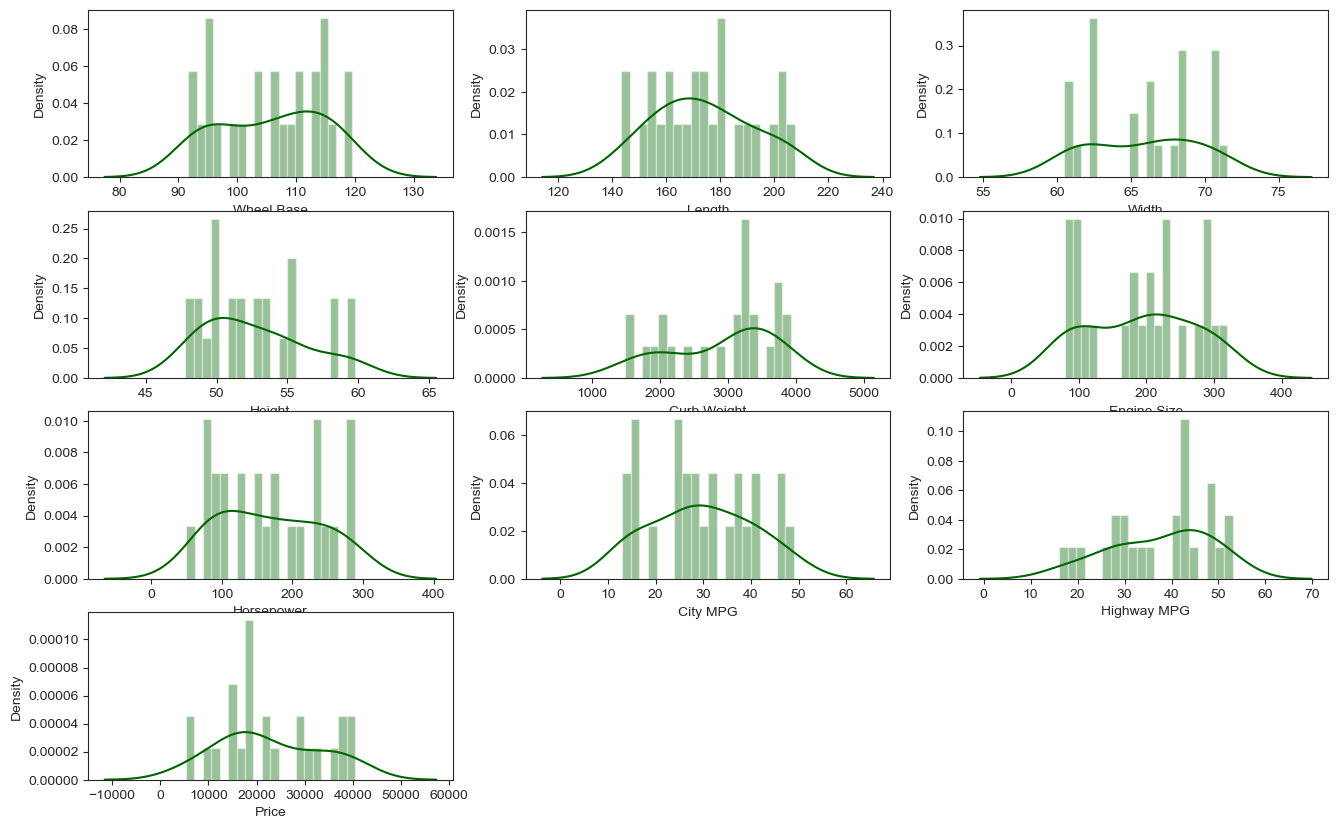

In [319]:
plt.figure(figsize = (16,10))
columns_lst = carfeatures_df_num.columns

for i in range(len(columns_lst)):
  plt.subplot(4, 3, i + 1)
  sns.distplot(carfeatures_df_num[columns_lst[i]], kde=True, bins =20, color = 'darkgreen');
  

# Outliers detection

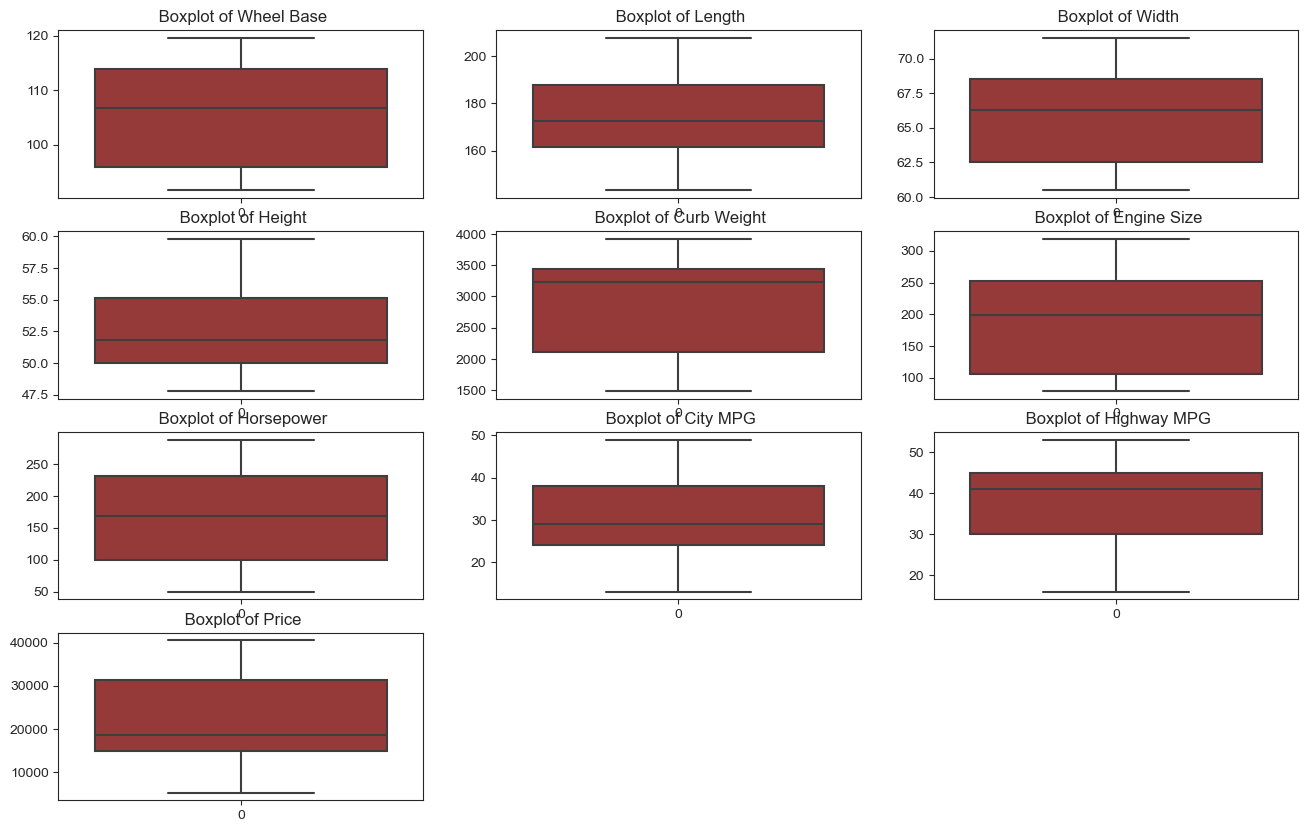

In [320]:
plt.figure(figsize = (16,10))

for i in range(len(columns_lst)):
  plt.subplot(4, 3, i + 1)
  sns.boxplot(carfeatures_df_num[columns_lst[i]],color='Brown');
  plt.title(' Boxplot of {}'.format(columns_lst[i]))

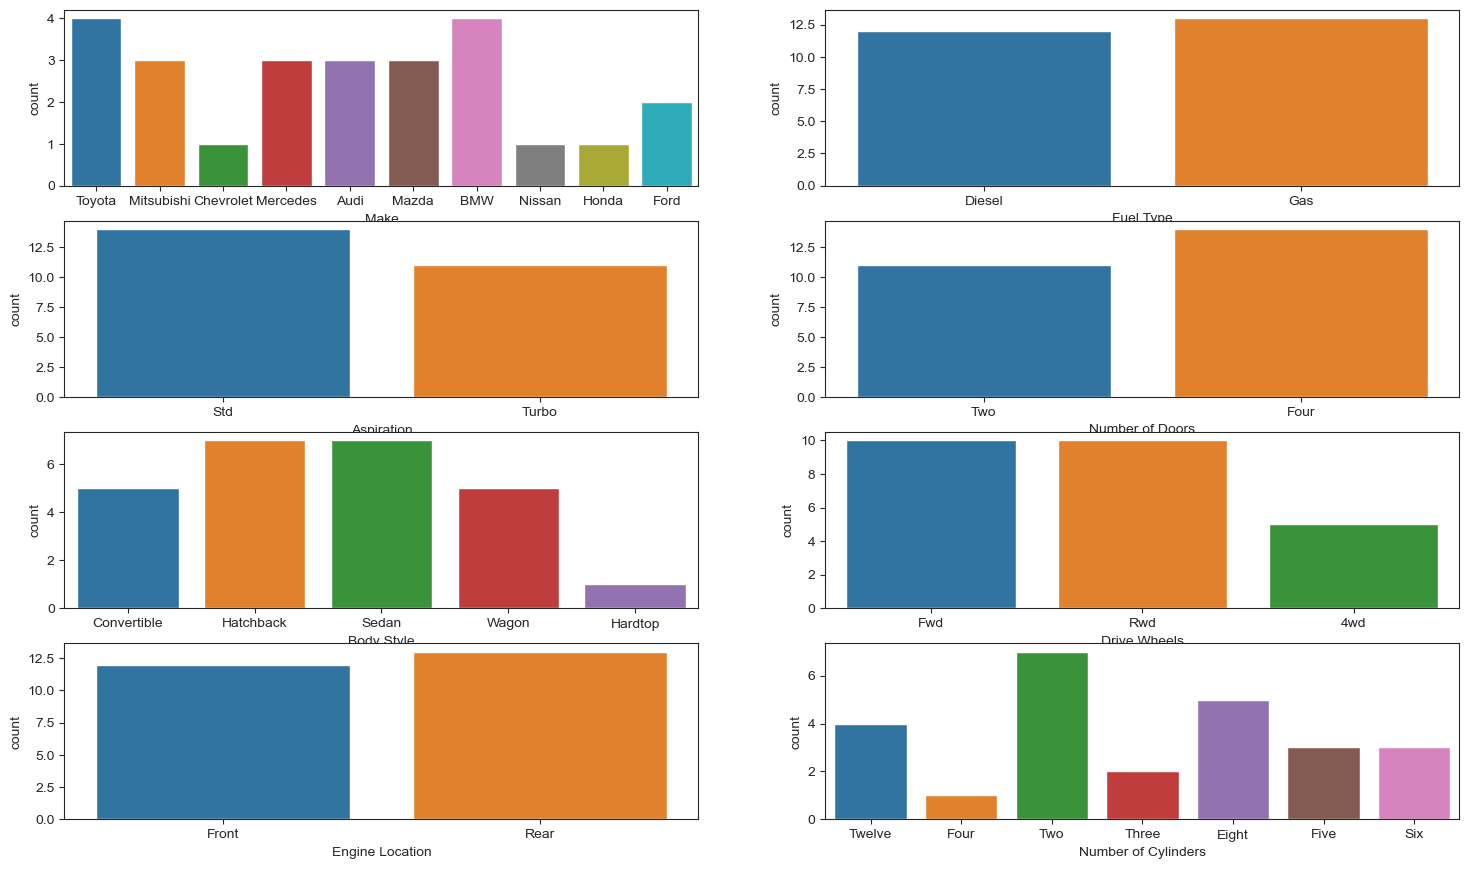

In [321]:
# Categorical Data

plt.figure(figsize = (18,16))
columns_lst2 = carfeatures_df_cat.columns
for i in range(len(columns_lst2)):
    plt.subplot(6, 2, i + 1)
    sns.countplot(x = carfeatures_df_cat[columns_lst2[i]], data = carfeatures_df_cat)

In [322]:
# Violin plots to see data distribution and checking for outliers

<Axes: xlabel='Curb Weight'>

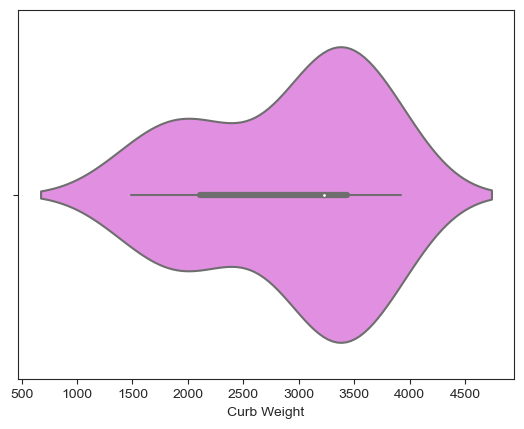

In [323]:
sns.violinplot(x=carfeatures_df['Curb Weight'], color = 'Violet')

<Axes: xlabel='Price'>

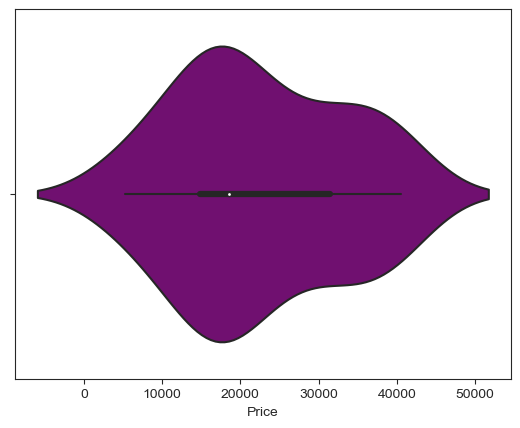

In [324]:
sns.violinplot(x=carfeatures_df['Price'], color = 'Purple')

<Axes: xlabel='Horsepower'>

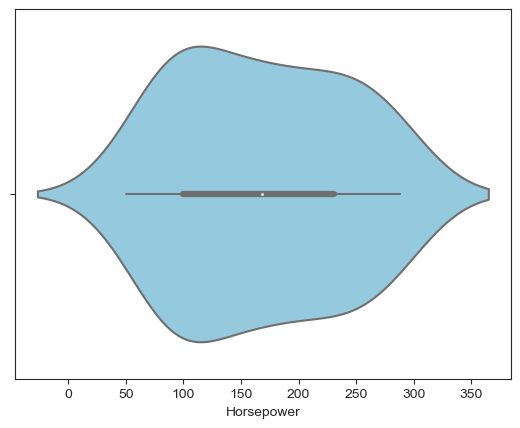

In [325]:
sns.violinplot(x=carfeatures_df['Horsepower'], color = 'Skyblue')

<Axes: xlabel='Engine Size'>

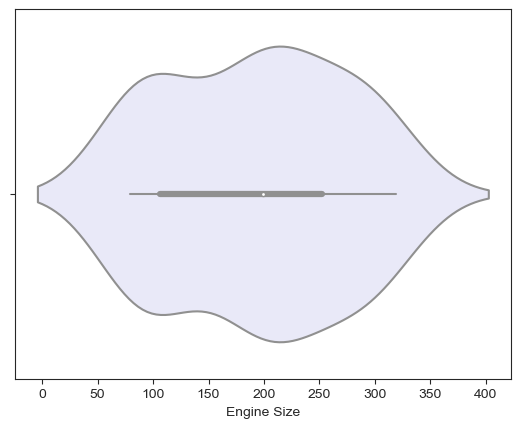

In [326]:
sns.violinplot(x=carfeatures_df['Engine Size'], color = 'Lavender')

# Bivariate Analysis

In [ ]:
# Correlation matrix

In [327]:
correlation_matrix = carfeatures_df[['Horsepower', 'Engine Size', 'Curb Weight', 'City MPG', 'Highway MPG', 'Price']].corr()
correlation_matrix

,Horsepower,Engine Size,Curb Weight,City MPG,Highway MPG,Price
Horsepower,1.000000,-0.410611,0.084433,-0.243198,-0.068389,0.187514
Engine Size,-0.410611,1.000000,-0.166797,0.008105,0.295211,-0.260208
Curb Weight,0.084433,-0.166797,1.000000,-0.451981,0.141714,0.145017
City MPG,-0.243198,0.008105,-0.451981,1.000000,-0.003489,0.003083
Highway MPG,-0.068389,0.295211,0.141714,-0.003489,1.000000,0.142473
Price,0.187514,-0.260208,0.145017,0.003083,0.142473,1.000000


Text(0.5, 1.0, 'Correlation between Horsepower, Engine size, Curb weight, City MPG, Highway MPG, Price')

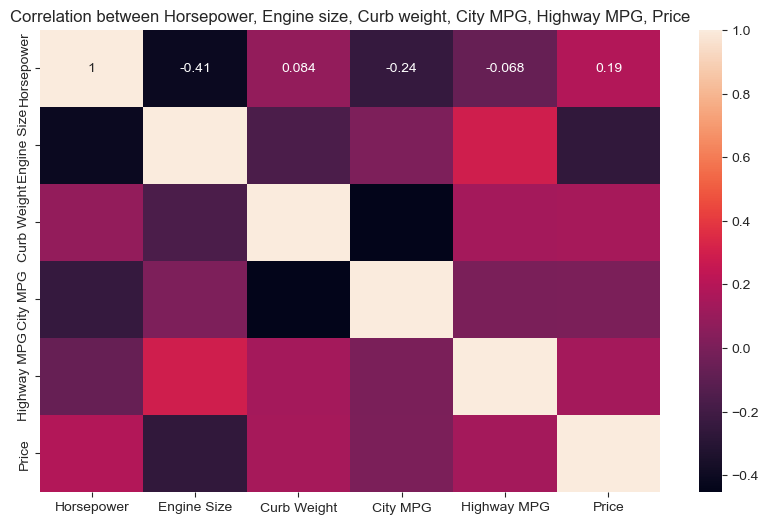

In [328]:
fig = plt.subplots(figsize=(10,6))
heatmap = sns.heatmap(correlation_matrix, annot=True)
heatmap
plt.title('Correlation between Horsepower, Engine size, Curb weight, City MPG, Highway MPG, Price')

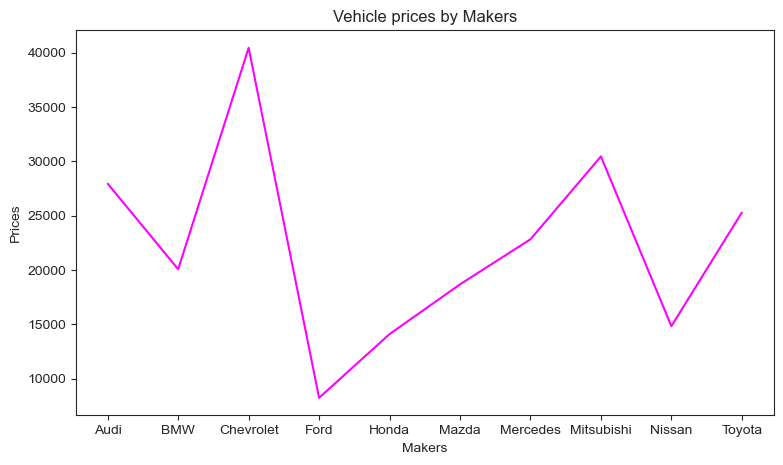

In [329]:
# Average vehicle prices for each makers

Average_vehicle_price = carfeatures_df.groupby('Make')['Price'].mean()
Average_vehicle_price_X = Average_vehicle_price.index.tolist()
Average_vehicle_price_Y = Average_vehicle_price.values.tolist()

plt.figure(figsize = (9, 5))
plt.title('Vehicle prices by Makers')
plt.xlabel('Makers')
plt.ylabel('Prices')
plt.plot(Average_vehicle_price_X, Average_vehicle_price_Y, color = 'Magenta')

<BarContainer object of 10 artists>

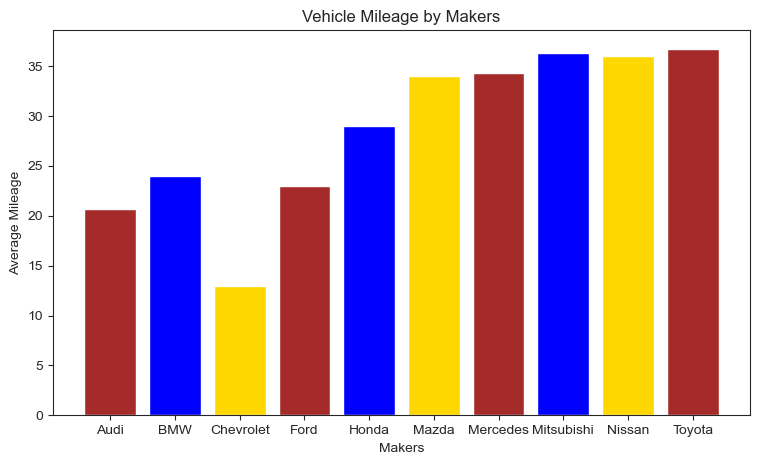

In [330]:
Average_vehicle_mileage = carfeatures_df.groupby('Make')['City MPG'].mean()
Average_vehicle_mileage_X = Average_vehicle_mileage.index.tolist()
Average_vehicle_mileage_Y = Average_vehicle_mileage.values.tolist()

plt.figure(figsize = (9, 5))
plt.title('Vehicle Mileage by Makers')
plt.xlabel('Makers')
plt.ylabel('Average Mileage')
plt.bar(Average_vehicle_mileage_X, Average_vehicle_mileage_Y, color = ['Brown', 'Blue', 'Gold'])

<BarContainer object of 10 artists>

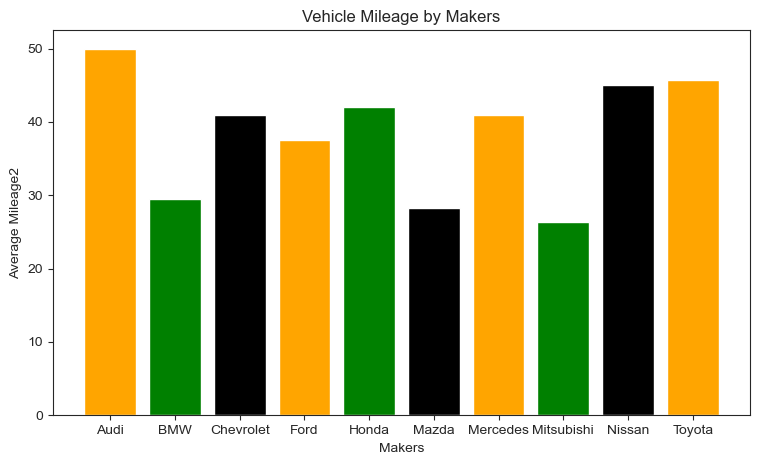

In [331]:
Average_vehicle_mileage2 = carfeatures_df.groupby('Make')['Highway MPG'].mean()
Average_vehicle_mileage2_X = Average_vehicle_mileage2.index.tolist()
Average_vehicle_mileage2_Y = Average_vehicle_mileage2.values.tolist()

plt.figure(figsize = (9, 5))
plt.title('Vehicle Mileage by Makers')
plt.xlabel('Makers')
plt.ylabel('Average Mileage2')
plt.bar(Average_vehicle_mileage2_X, Average_vehicle_mileage2_Y, color = ['Orange', 'Green','Black'])

<BarContainer object of 2 artists>

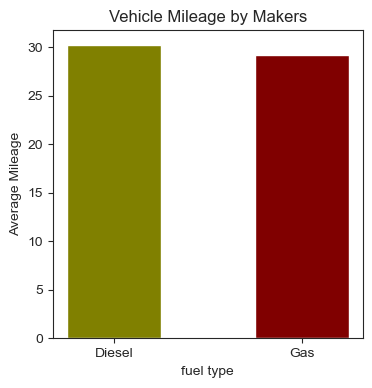

In [332]:
Mileage_by_fueltype = carfeatures_df.groupby('Fuel Type')['City MPG'].mean()
Mileage_by_fueltype_X = Mileage_by_fueltype.index.tolist()
Mileage_by_fueltype_Y = Mileage_by_fueltype.values.tolist()

plt.figure(figsize = (4, 4))
plt.title('Vehicle Mileage by Makers')
plt.xlabel('fuel type')
plt.ylabel('Average Mileage')
plt.bar(Mileage_by_fueltype_X, Mileage_by_fueltype_Y, color = ['Olive', 'Maroon'], width = 0.5)

<BarContainer object of 2 artists>

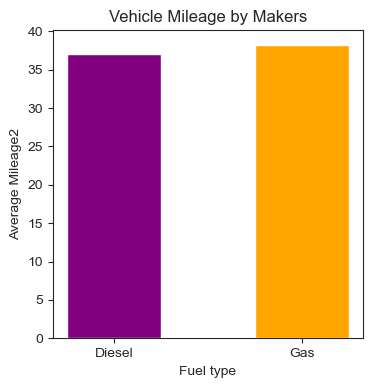

In [333]:
Mileage_by_fueltype2 = carfeatures_df.groupby('Fuel Type')['Highway MPG'].mean()
Mileage_by_fueltype2_X = Mileage_by_fueltype2.index.tolist()
Mileage_by_fueltype2_Y = Mileage_by_fueltype2.values.tolist()

plt.figure(figsize = (4, 4))
plt.title('Vehicle Mileage by Makers')
plt.xlabel('Fuel type')
plt.ylabel('Average Mileage2')
plt.bar(Mileage_by_fueltype2_X, Mileage_by_fueltype2_Y, color = ['Purple', 'Orange'], width = 0.5)

Statistical Summary of the data

In [334]:
carfeatures_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wheel Base,25.0,105.736,9.046403,91.7,96.0,106.8,113.9,119.6
Length,25.0,173.928,18.508523,143.4,161.4,172.4,187.8,207.6
Width,25.0,65.868,3.632804,60.5,62.5,66.3,68.5,71.5
Height,25.0,52.680,3.623534,47.8,50.0,51.8,55.1,59.8
Curb Weight,25.0,2907.720,777.650924,1488.0,2108.0,3231.0,3433.0,3922.0
Engine Size,25.0,192.360,79.342548,79.0,106.0,199.0,252.0,319.0
Horsepower,25.0,168.760,73.189981,50.0,100.0,168.0,231.0,288.0
City MPG,25.0,29.720,10.659581,13.0,24.0,29.0,38.0,49.0
Highway MPG,25.0,37.640,10.664896,16.0,30.0,41.0,45.0,53.0
Price,25.0,22684.920,10684.205266,5272.0,14838.0,18524.0,31393.0,40466.0


# Identify the costliest car and the cheapest car by average price.

In [335]:
cheapest_car = carfeatures_df.groupby('Make')['Price'].mean().idxmin()
cheapest_car

'Ford'

In [336]:
costliest_car = carfeatures_df.groupby('Make')['Price'].mean().idxmax()
costliest_car

'Chevrolet'

# Which fuel type car has the highest average price?

In [337]:
Higher_price_fuel_type = carfeatures_df.groupby('Fuel Type')['Price'].mean().idxmax()
Higher_price_fuel_type

'Gas'

# For the given dataset, construct the following contingency table (take “make” as row variable)

In [338]:
pd.crosstab(carfeatures_df['Make'], carfeatures_df['Fuel Type'])

Fuel Type,Diesel,Gas
Make,,
Audi,2,1
BMW,4,0
Chevrolet,0,1
Ford,0,2
Honda,0,1
Mazda,2,1
Mercedes,1,2
Mitsubishi,1,2
Nissan,0,1


In [339]:
carfeatures_df.head()

,Make,Fuel Type,Aspiration,Number of Doors,Body Style,Drive Wheels,Engine Location,Number of Cylinders,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Horsepower,City MPG,Highway MPG,Price
0,Toyota,Diesel,Std,Two,Convertible,Fwd,Front,Twelve,95.1,175.9,60.6,59.4,1758,252,279,40,41,5272
1,Mitsubishi,Diesel,Std,Four,Convertible,Fwd,Rear,Four,91.7,153.9,60.5,55.1,1887,95,150,32,42,31393
2,Chevrolet,Gas,Turbo,Four,Hatchback,Rwd,Front,Two,116.2,203.5,65.3,58.5,3815,231,129,13,41,40450
3,Mitsubishi,Gas,Turbo,Four,Hatchback,Fwd,Front,Three,112.8,154.3,64.9,51.4,3367,106,230,39,21,37881
4,Mercedes,Gas,Std,Four,Sedan,Rwd,Rear,Two,115.1,143.4,62.6,49.6,3433,294,96,46,52,18087


In [340]:
pd.crosstab(carfeatures_df['Make'], carfeatures_df['Aspiration'])

Aspiration,Std,Turbo
Make,,
Audi,1,2
BMW,3,1
Chevrolet,0,1
Ford,0,2
Honda,0,1
Mazda,1,2
Mercedes,2,1
Mitsubishi,2,1
Nissan,1,0


In [341]:
pd.crosstab(carfeatures_df['Make'], carfeatures_df['Number of Doors'])

Number of Doors,Four,Two
Make,,
Audi,1,2
BMW,3,1
Chevrolet,1,0
Ford,1,1
Honda,1,0
Mazda,1,2
Mercedes,2,1
Mitsubishi,3,0
Nissan,1,0


In [342]:
pd.crosstab(carfeatures_df['Make'], carfeatures_df['Body Style'], margins = True)

Body Style,Convertible,Hardtop,Hatchback,Sedan,Wagon,All
Make,,,,,,
Audi,1,0,0,1,1,3
BMW,1,1,1,0,1,4
Chevrolet,0,0,1,0,0,1
Ford,0,0,0,0,2,2
Honda,0,0,0,1,0,1
Mazda,0,0,2,1,0,3
Mercedes,0,0,1,2,0,3
Mitsubishi,1,0,1,0,1,3
Nissan,0,0,0,1,0,1


In [343]:
Cars_cylinders = pd.crosstab(carfeatures_df['Make'], carfeatures_df['Number of Cylinders'], margins = True)
Cars_cylinders

Number of Cylinders,Eight,Five,Four,Six,Three,Twelve,Two,All
Make,,,,,,,,
Audi,1,1,0,1,0,0,0,3
BMW,2,0,0,0,0,1,1,4
Chevrolet,0,0,0,0,0,0,1,1
Ford,0,0,0,1,0,0,1,2
Honda,0,0,0,0,1,0,0,1
Mazda,1,1,0,0,0,0,1,3
Mercedes,0,1,0,1,0,0,1,3
Mitsubishi,0,0,1,0,1,1,0,3
Nissan,0,0,0,0,0,0,1,1


# What is the probability that a randomly selected car will be a BMW?

In [344]:
total_cars = carfeatures_df.shape[0]
total_BMW = carfeatures_df[carfeatures_df['Make'] == 'BMW'].shape[0]
probability_BMW = total_BMW/total_cars

probability_BMW

0.16

# What is the probability that a randomly selected car will be an Audi?

In [345]:
total_Audi = carfeatures_df[carfeatures_df['Make'] == 'Audi'].shape[0]
probability_Audi = total_Audi/total_cars

probability_Audi

0.12

# Form the null and alternate hypothesis to test whether the price of Gas cars is significantly different from that of Diesel Cars

Null Hypothesis: Null hypothesis states that there is no price difference between Gas cars and Diesel cars

Alternate Hypothesis: Alternate hypothesis states that there is difference in price.

H0: μ(Car Price for Gas Fuel type) = μ(Car Price for Diesel Fuel type)

H1: μ(Car Price for Gas Fuel type) != μ(Car Price for Diesel Fuel type)

# Form the null and alternate hypothesis and find the p-value.At 0.05 level of significance, is the price of gas cars significantly different from that of diesel cars?

In [346]:
import scipy.stats as stats

parameter1 = carfeatures_df[carfeatures_df['Fuel Type'] == 'Gas']
parameter2 = carfeatures_df[carfeatures_df['Fuel Type'] == 'Diesel']

t_statistic, p_value = stats.ttest_ind(parameter1['Price'], parameter2['Price'])
print('T statistic value:', t_statistic)
print('P value:', p_value)

if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject the null hypothesis')


T statistic value: 1.1236308256408953
P value: 0.27276131360711153
Failed to reject the null hypothesis


# Suppose you randomly select a car from this dataset. What is the probability that it is a 'Luxury Car' ?( consider BMW, Mercedes and Audi as a luxary car under the column Make )

In [347]:
total_cars = carfeatures_df['Make'].value_counts().sum()
luxurious_cars = carfeatures_df[(carfeatures_df['Make']=='BMW') | (carfeatures_df['Make']=='Mercedes') | (carfeatures_df['Make']=='Audi')]
total_luxurious_cars = luxurious_cars['Make'].value_counts().sum()

probability_luxurious_cars = total_luxurious_cars/total_cars

print('Probability of selecting a luxurious car is:', probability_luxurious_cars)

Probability of selecting a luxurious car is: 0.4


# You want to select a subset of three unique cars from the dataset to participate in a race. How many different ways can you arrange the cars in the race, considering their 'Make' as the criteria?


In [348]:
import itertools

car_manufacturers = list(carfeatures_df['Make'].unique())

cars_to_select = 3

permutations = list(itertools.permutations(car_manufacturers, cars_to_select))

ways_for_arrangement = len(permutations)

print('Total number of ways to arrange 3 cars is',  ways_for_arrangement)

Total number of ways to arrange 3 cars is 720


# If you randomly pick a car with 8 cylinders, what is the probability that BMW?

In [349]:
Cars_cylinders

Number of Cylinders,Eight,Five,Four,Six,Three,Twelve,Two,All
Make,,,,,,,,
Audi,1,1,0,1,0,0,0,3
BMW,2,0,0,0,0,1,1,4
Chevrolet,0,0,0,0,0,0,1,1
Ford,0,0,0,1,0,0,1,2
Honda,0,0,0,0,1,0,0,1
Mazda,1,1,0,0,0,0,1,3
Mercedes,0,1,0,1,0,0,1,3
Mitsubishi,0,0,1,0,1,1,0,3
Nissan,0,0,0,0,0,0,1,1


In [350]:
BMW_with_8cylinders = Cars_cylinders.iloc[1, 0]
Total_with_8cylinders = Cars_cylinders.iloc[10, 0]
probability_of_BMW_if_8cylinder = BMW_with_8cylinders/Total_with_8cylinders

print('If a 8 cylinder car is picked at random, probability of it being a BMW is', probability_of_BMW_if_8cylinder)

If a 8 cylinder car is picked at random, probability of it being a BMW is 0.4


# You are conducting a random survey by selecting 7 cars from the dataset. Calculate the probability that exactly 3 out of the 7 selected cars have 'Turbo' aspiration.

In [356]:
total_cars

25

In [358]:
turbo_cars = carfeatures_df[carfeatures_df['Aspiration'] == 'Turbo'].shape[0]
probability = turbo_cars/total_cars

# Probability of exactly 3 out of 7 cars has turbo
k = 3
n = 7

turbo_car_probability = stats.binom.pmf(k, n, probability)
print('The probability that exactly 3 cars out of 7 selected cars have turbo is',round(turbo_car_probability, 2))

The probability that exactly 3 cars out of 7 selected cars have turbo is 0.29
